In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df=pd.read_csv("Chicago_Crimes_2012_to_2017.csv")
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


ID - Unique identifier for the record.<br/>

Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.<br/>

Date - Date when the incident occurred. this is sometimes a best estimate.<br/>

Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.<br/>

IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.
<br/>
Primary Type - The primary description of the IUCR code.<br/>

Description - The secondary description of the IUCR code, a subcategory of the primary description.<br/>

Location Description - Description of the location where the incident occurred.<br/>

Arrest - Indicates whether an arrest was made.<br/>

Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.<br/>

Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.
<br/>
District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.
<br/>
Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.
<br/>
Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.
<br/>
FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.
<br/>
X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
<br/>
Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
<br/>
Year - Year the incident occurred.
<br/>
Updated On - Date and time the record was last updated.
<br/>
Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
<br/>
Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
<br/>
Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

In [2]:
df.shape

(1456714, 23)

In [68]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [3]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [4]:
df.isnull().sum().sum()

187129

Data cleaning

In [5]:
df[df.Ward.isnull()].District.head()

43786     16.0
90748     16.0
94281     16.0
132444    16.0
186232    16.0
Name: District, dtype: float64

In [6]:
df[df["Ward"] == 24.0].District.unique()
#for the same Ward we don't have the same District
#1 ward -> 00 districts

array([10., 11., 15., 25., 12.])

In [7]:
df[df["X Coordinate"].isnull() & df["Y Coordinate"].isnull() & df["Latitude"].isnull() & df["Longitude"].isnull() & df["Location"].isnull()].shape
#In 37083 we don t have the X Coordinate,Y Coordinate,Latitude,Longitude and Location

(37083, 23)

In [8]:
df[df["Community Area"].isnull()].head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
23424,829242,8530927,HV198973,03/15/2012 02:58:58 PM,072XX W 63RD PL,2027,NARCOTICS,POSS: CRACK,RESIDENCE,False,...,1.0,NaN,18,NaN,NaN,2012,08/17/2015 03:03:40 PM,NaN,NaN,NaN
23574,830138,8999323,HW137470,01/30/2013 10:35:00 AM,074XX W 60TH PL,2022,NARCOTICS,POSS: COCAINE,APARTMENT,False,...,27.0,NaN,18,NaN,NaN,2013,08/17/2015 03:03:40 PM,NaN,NaN,NaN
23643,830387,9108846,HW229995,04/11/2013 05:00:00 PM,065XX S CICERO AV,2022,NARCOTICS,POSS: COCAINE,HOTEL/MOTEL,False,...,19.0,NaN,18,NaN,NaN,2013,08/17/2015 03:03:40 PM,NaN,NaN,NaN
23646,830392,9110219,HW235694,04/16/2013 04:41:00 PM,0000X S CDNFIDENTIAL,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),SIDEWALK,False,...,2.0,NaN,18,NaN,NaN,2013,08/17/2015 03:03:40 PM,NaN,NaN,NaN
23648,830399,9113690,HW196946,03/16/2013 04:31:00 PM,004XX S LAKEHURST RD,2091,NARCOTICS,FORFEIT PROPERTY,STREET,False,...,2.0,NaN,26,NaN,NaN,2013,08/17/2015 03:03:40 PM,NaN,NaN,NaN


In [9]:
df[df["Ward"] == 2.0].head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
12,2193,10508717,HZ250415,05/03/2016 05:30:00 PM,011XX W JACKSON BLVD,0890,THEFT,FROM BUILDING,OTHER,False,...,2.0,28.0,06,1168776.0,1898793.0,2016,05/10/2016 03:56:50 PM,41.877812,-87.655758,"(41.877811861, -87.655758012)"
30,6399,10509096,HZ250700,05/03/2016 04:45:00 PM,003XX W MONROE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,2.0,32.0,07,1174166.0,1899864.0,2016,05/10/2016 03:56:50 PM,41.880632,-87.635935,"(41.88063228, -87.635935494)"
62,13691,10509486,HZ250872,05/03/2016 07:30:00 PM,011XX S STATE ST,0810,THEFT,OVER $500,CTA TRAIN,False,...,2.0,32.0,06,1176517.0,1895340.0,2016,05/10/2016 03:56:50 PM,41.868165,-87.627440,"(41.868165405, -87.62743954)"
120,27452,10510864,HZ249302,05/03/2016 07:40:00 AM,016XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,OTHER,False,...,2.0,33.0,08B,1177485.0,1892305.0,2016,05/23/2016 03:48:54 PM,41.859815,-87.623978,"(41.859815277, -87.623977927)"
127,28932,10511361,HZ252601,05/03/2016 12:27:00 PM,018XX S CALUMET AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,OTHER,False,...,2.0,33.0,11,1178756.0,1891402.0,2016,05/10/2016 03:56:50 PM,41.857308,-87.619340,"(41.857308478, -87.619340066)"


In [10]:
df[df["Ward"] == 2.0]["Community Area"].unique()
#for the same Ward we don't have the same Community Area
#1 ward -> 00 Community Area

array([28., 32., 33., 27., 35., nan])

In [66]:
print('the null values just are the',(37083/1456714)*100,'% of my data.')

the null values just are the 2.5456609876750003 % of my data.


In [12]:
#We can't replace the missing data
#so I'm going to drop this 2.57% of my data
df.dropna(axis=0 , how='any' , inplace= True)

In [13]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [14]:
df.shape

(1418365, 23)

Feature transformation

In [15]:
df[df.duplicated()]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


In [16]:
df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,1108,10508702,HZ250447,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,8.0,44.0,04B,1183336.0,1850642.0,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,1130,10508703,HZ250489,05/03/2016 10:30:00 PM,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,...,3.0,35.0,08B,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,1801,10508704,HZ250514,05/03/2016 09:30:00 PM,002XX E 46TH ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,...,3.0,38.0,08B,1178514.0,1874573.0,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,1868,10508709,HZ250523,05/03/2016 04:00:00 PM,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,...,40.0,1.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,1891,10508982,HZ250667,05/03/2016 10:30:00 PM,069XX S ASHLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,...,17.0,67.0,08B,1166876.0,1858796.0,2016,05/10/2016 03:56:50 PM,41.768097,-87.663879,"(41.768096835, -87.663878589)"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1418365 non-null int64
ID                      1418365 non-null int64
Case Number             1418365 non-null object
Date                    1418365 non-null object
Block                   1418365 non-null object
IUCR                    1418365 non-null object
Primary Type            1418365 non-null object
Description             1418365 non-null object
Location Description    1418365 non-null object
Arrest                  1418365 non-null bool
Domestic                1418365 non-null bool
Beat                    1418365 non-null int64
District                1418365 non-null float64
Ward                    1418365 non-null float64
Community Area          1418365 non-null float64
FBI Code                1418365 non-null object
X Coordinate            1418365 non-null float64
Y Coordinate            1418365 non-null float64
Year                    1

In [18]:
df["Case Number"].unique()

array(['HZ250496', 'HZ250409', 'HZ250503', ..., 'HZ250479', 'HZ250370',
       'HZ250517'], dtype=object)

In [19]:
df["Case Number"].values.shape
#unique value for each crime

(1418365,)

In [20]:
#Convert Date column to Date Time format
df["Date"]= pd.to_datetime(df["Date"], format="%m/%d/%Y %H:%M:%S %p") 

In [21]:
df["Updated On"]= pd.to_datetime(df["Updated On"], format="%m/%d/%Y %H:%M:%S %p") 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1418365 non-null int64
ID                      1418365 non-null int64
Case Number             1418365 non-null object
Date                    1418365 non-null datetime64[ns]
Block                   1418365 non-null object
IUCR                    1418365 non-null object
Primary Type            1418365 non-null object
Description             1418365 non-null object
Location Description    1418365 non-null object
Arrest                  1418365 non-null bool
Domestic                1418365 non-null bool
Beat                    1418365 non-null int64
District                1418365 non-null float64
Ward                    1418365 non-null float64
Community Area          1418365 non-null float64
FBI Code                1418365 non-null object
X Coordinate            1418365 non-null float64
Y Coordinate            1418365 non-null float64
Year             

In [23]:
df.Block.value_counts()

001XX N STATE ST                       3567
0000X W TERMINAL ST                    2671
008XX N MICHIGAN AVE                   2430
076XX S CICERO AVE                     2090
0000X N STATE ST                       1810
064XX S DR MARTIN LUTHER KING JR DR    1319
083XX S STEWART AVE                    1201
063XX S DR MARTIN LUTHER KING JR DR    1116
051XX W MADISON ST                     1104
046XX W NORTH AVE                      1097
009XX W BELMONT AVE                    1078
011XX S CANAL ST                       1053
008XX N STATE ST                       1039
040XX W LAKE ST                        1001
006XX N MICHIGAN AVE                    930
0000X W HUBBARD ST                      900
038XX W ROOSEVELT RD                    891
012XX S WABASH AVE                      891
0000X S STATE ST                        885
007XX N MICHIGAN AVE                    880
042XX W MADISON ST                      880
035XX N CLARK ST                        871
100XX W OHARE ST                

In [24]:
len(df.Block.unique())

32546

In [25]:
df.Arrest.value_counts()

False    1047308
True      371057
Name: Arrest, dtype: int64

In [71]:
df["Primary Type"].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [26]:
df["Primary Type"].value_counts()

THEFT                                321950
BATTERY                              258941
CRIMINAL DAMAGE                      152812
NARCOTICS                            131177
ASSAULT                               89508
OTHER OFFENSE                         85361
BURGLARY                              81668
DECEPTIVE PRACTICE                    67609
MOTOR VEHICLE THEFT                   59856
ROBBERY                               56092
CRIMINAL TRESPASS                     36429
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10590
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2590
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

In [27]:
len(df["Primary Type"].unique())

33

In [74]:
df["Beat"].unique()

array([1022,  313, 1524, 1532, 1523,  631,  133,  215, 2432,  735,  334,
       1834, 1232, 1434,  831, 1424,  225, 2232,  222,  235, 1932, 1611,
       1831, 2223,  915,  821,  613,  122, 1513, 2534, 1923, 2433,  511,
        925, 1733,  331,  725,  533,  824,  811, 2213, 1732,  112,  424,
       2511,  914,  324, 1832,  723, 1812,  912,  622, 2531, 1422, 1432,
        922, 1122,  123,  111,  121,  512,  411, 1032, 1623,  611,  634,
        624, 1023, 2032,  712, 2535, 1634, 2412,  333, 2012, 1824,  822,
        214, 1121, 2212, 1112,  321,  412,  833,  825, 1633, 1933,  633,
        931, 1712, 2533, 1833, 1024, 1235, 1924,  623, 1934,  332,  131,
        223, 1724, 1814,  132, 1411, 1214, 1222,  232, 1632, 1231,  715,
        832, 1225,  312,  823,  422,  935,  835, 1533,  934, 1134,  523,
        421,  724, 1213,  234, 2013, 2422, 2411, 2532, 1132, 1021, 1034,
        323,  211,  531, 1131, 1133,  726, 1613,  632, 1033,  614, 1821,
        612, 1731,  711,  532, 1925, 2424, 1135, 16

In [28]:
df["Ward"].value_counts()

28.0    69969
42.0    64772
24.0    61940
2.0     55279
27.0    50279
17.0    48258
6.0     47256
20.0    44001
21.0    43729
8.0     39237
7.0     38675
16.0    38664
34.0    38438
37.0    37818
15.0    37319
3.0     37076
9.0     36327
29.0    34355
5.0     34187
1.0     25465
10.0    25374
4.0     23865
18.0    23673
32.0    23198
44.0    22371
26.0    21721
25.0    19976
14.0    19737
31.0    19676
30.0    19650
11.0    19060
46.0    18904
49.0    18515
13.0    18250
43.0    18049
12.0    17694
35.0    17404
23.0    16936
22.0    16725
41.0    16102
38.0    15156
45.0    14857
36.0    14382
50.0    14174
40.0    14133
47.0    13779
33.0    13498
39.0    13314
48.0    12849
19.0    12299
Name: Ward, dtype: int64

In [29]:
len(df["Ward"].unique())

50

In [30]:
df["Description"].unique()

array(['DOMESTIC BATTERY SIMPLE', 'RECKLESS CONDUCT', 'SIMPLE',
       '$500 AND UNDER', 'AGGRAVATED: HANDGUN',
       'UNLAWFUL POSS OF HANDGUN', 'FROM BUILDING', 'OVER $500',
       'ARMED: OTHER DANGEROUS WEAPON', 'AUTOMOBILE',
       'OTHER VEHICLE OFFENSE', 'FRAUD OR CONFIDENCE GAME',
       'FINANCIAL IDENTITY THEFT OVER $ 300', 'CRIMINAL DEFACEMENT',
       'TO PROPERTY', 'HARASSMENT BY TELEPHONE',
       'RECKLESS FIREARM DISCHARGE', 'TELEPHONE THREAT',
       'ILLEGAL USE CASH CARD', 'TO VEHICLE', 'RETAIL THEFT',
       'FINANCIAL IDENTITY THEFT $300 AND UNDER', 'CREDIT CARD FRAUD',
       'BOMB THREAT', 'STRONGARM - NO WEAPON', 'TO LAND',
       'ANIMAL ABUSE/NEGLECT', 'UNLAWFUL ENTRY', 'FALSE FIRE ALARM',
       'FORCIBLE ENTRY', 'ATTEMPT FORCIBLE ENTRY', 'BOGUS CHECK',
       'ARMED: HANDGUN', 'PURSE-SNATCHING',
       'HARASSMENT BY ELECTRONIC MEANS', 'AGGRAVATED: OTHER',
       'POSS: CANNABIS 30GMS OR LESS', 'CRIMINAL SEXUAL ABUSE',
       'ARMED:KNIFE/CUTTING INSTRUMENT

In [31]:
len(df["Description"].unique())

340

In [32]:
len(df['FBI Code'].unique())

26

In [33]:
data=df.copy()

In [34]:
#Date-> Day/Month/time we already have the year
data["Day"]=data.Date.dt.day
data["Month"]=data.Date.dt.month
data["Time"]=data.Date.dt.time

In [35]:
data.drop(["ID","Date","Updated On"],axis=1,inplace=True)

In [36]:
data.head()

,Unnamed: 0,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Time
0,3,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,08B,1154907.0,1893681.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)",3,5,11:40:00
1,89,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,08B,1183066.0,1864330.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)",3,5,09:40:00
2,197,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,...,24,1140789.0,1904819.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)",3,5,11:31:00
3,673,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,...,08B,1143223.0,1901475.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)",3,5,10:10:00
4,911,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,...,06,1139890.0,1901675.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)",3,5,10:00:00


In [37]:
data.describe(include="all")

,Unnamed: 0,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Time
count,1.418365e+06,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1.418365e+06,...,1418365,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1418365,1.418365e+06,1.418365e+06,1418365
unique,NaN,1418258,32546,363,33,340,140,2,2,NaN,...,26,NaN,NaN,NaN,NaN,NaN,368079,NaN,NaN,3235
top,NaN,HZ140230,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,False,False,NaN,...,06,NaN,NaN,NaN,NaN,NaN,"(41.883500187, -87.627876698)",NaN,NaN,09:00:00
freq,NaN,6,3567,132848,321950,147845,325084,1047308,1203231,NaN,...,321950,NaN,NaN,NaN,NaN,NaN,2093,NaN,NaN,58185
mean,3.273045e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150282e+03,...,NaN,1.164399e+06,1.885510e+06,2.013851e+03,4.184144e+01,-8.767223e+01,NaN,1.567706e+01,6.558481e+00,NaN
std,1.183059e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.916395e+02,...,NaN,1.843389e+04,3.413940e+04,1.423228e+00,9.399956e-02,6.637181e-02,NaN,8.832100e+00,3.331287e+00,NaN
min,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110000e+02,...,NaN,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01,NaN,1.000000e+00,1.000000e+00,NaN
25%,2.696813e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.130000e+02,...,NaN,1.152540e+06,1.858752e+06,2.013000e+03,4.176784e+01,-8.771529e+01,NaN,8.000000e+00,4.000000e+00,NaN
50%,3.052281e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.024000e+03,...,NaN,1.166015e+06,1.891485e+06,2.014000e+03,4.185787e+01,-8.766614e+01,NaN,1.600000e+01,7.000000e+00,NaN
75%,3.409553e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.711000e+03,...,NaN,1.176363e+06,1.908687e+06,2.015000e+03,4.190524e+01,-8.762812e+01,NaN,2.300000e+01,9.000000e+00,NaN


In [38]:
data.describe()

,Unnamed: 0,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Day,Month
count,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06
mean,3.273045e+06,1.150282e+03,1.125518e+01,2.285474e+01,3.747455e+01,1.164399e+06,1.885510e+06,2.013851e+03,4.184144e+01,-8.767223e+01,1.567706e+01,6.558481e+00
std,1.183059e+06,6.916395e+02,6.904508e+00,1.379378e+01,2.142995e+01,1.843389e+04,3.413940e+04,1.423228e+00,9.399956e-02,6.637181e-02,8.832100e+00,3.331287e+00
min,3.000000e+00,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01,1.000000e+00,1.000000e+00
25%,2.696813e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152540e+06,1.858752e+06,2.013000e+03,4.176784e+01,-8.771529e+01,8.000000e+00,4.000000e+00
50%,3.052281e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166015e+06,1.891485e+06,2.014000e+03,4.185787e+01,-8.766614e+01,1.600000e+01,7.000000e+00
75%,3.409553e+06,1.711000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176363e+06,1.908687e+06,2.015000e+03,4.190524e+01,-8.762812e+01,2.300000e+01,9.000000e+00
max,6.253474e+06,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01,3.100000e+01,1.200000e+01


In [39]:
data.describe(include=['O'])

,Case Number,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Location,Time
count,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365
unique,1418258,32546,363,33,340,140,26,368079,3235
top,HZ140230,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,06,"(41.883500187, -87.627876698)",09:00:00
freq,6,3567,132848,321950,147845,325084,321950,2093,58185


In [40]:
data.describe(include=['bool'])

,Arrest,Domestic
count,1418365,1418365
unique,2,2
top,False,False
freq,1047308,1203231


Text(0.5, 0, 'Arrest')

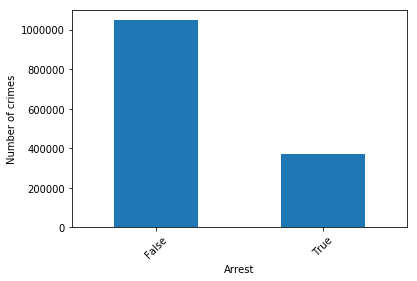

In [41]:
arrest=df["Arrest"].value_counts()
arrest.plot.bar(rot=45)
plt.ylabel("Number of crimes")
plt.xlabel("Arrest")

The arrest wasn't made in most of the crimes.

Text(0.5, 0, 'Domestic')

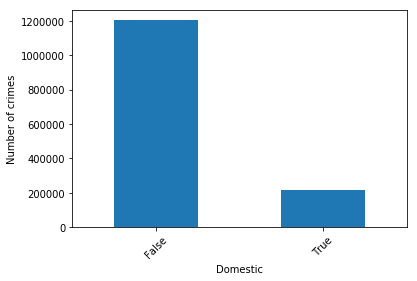

In [42]:
arrest=df["Domestic"].value_counts()
arrest.plot.bar(rot=45)
plt.ylabel("Number of crimes")
plt.xlabel("Domestic")

The incident wasn't domestic in most of the crimes.

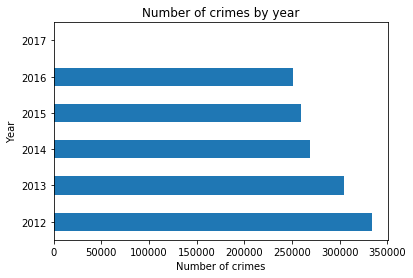

In [43]:
data.groupby([data.Year]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Year')
plt.title('Number of crimes by year')
plt.show()

The number of crimes is decreasing.

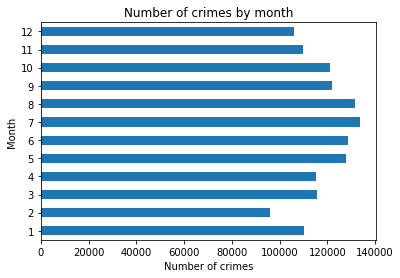

In [44]:
data.groupby([data.Month]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Month')
plt.title('Number of crimes by month')
plt.show()

In February we have the lowest number of crimes but we can not conclude because February has less number of days than other months.


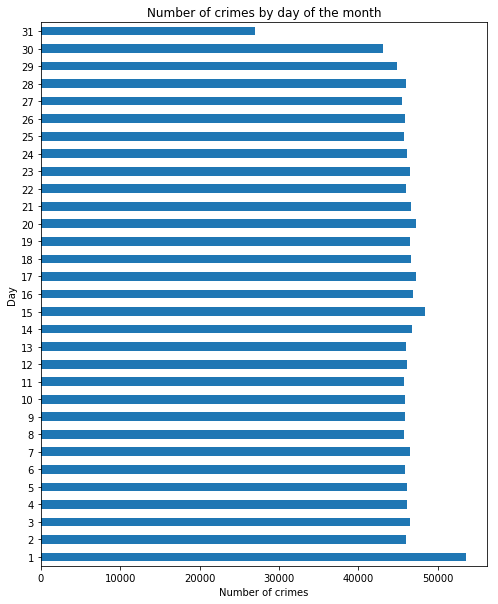

In [45]:
plt.figure(figsize=(8,10))
data.groupby([data.Day]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Day')
plt.title('Number of crimes by day of the month')
plt.show()

1st day of the month records most crimes.Also we see that 31st day has least number of crimes, but it can be because day 31 is only present in 7 months of the year and hence will have less crime records than any other day.

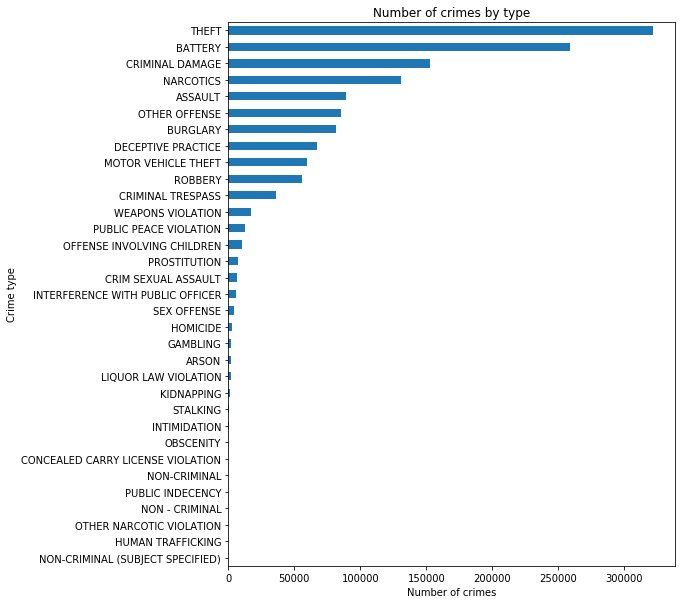

In [46]:
plt.figure(figsize=(8,10))
data.groupby([data["Primary Type"]]).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Crime type')
plt.title('Number of crimes by type')
plt.show()

Theft is the most common crime in Chicago ollowed by Battery  and criminal damage...

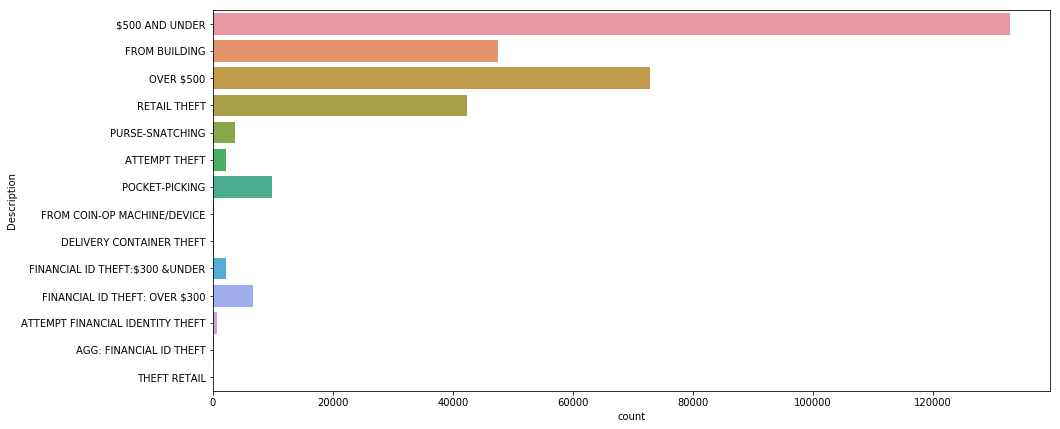

In [47]:
plt.figure(figsize = (15, 7))
theft = data[data['Primary Type'] == 'THEFT']
sns.countplot(y = theft['Description'])

140


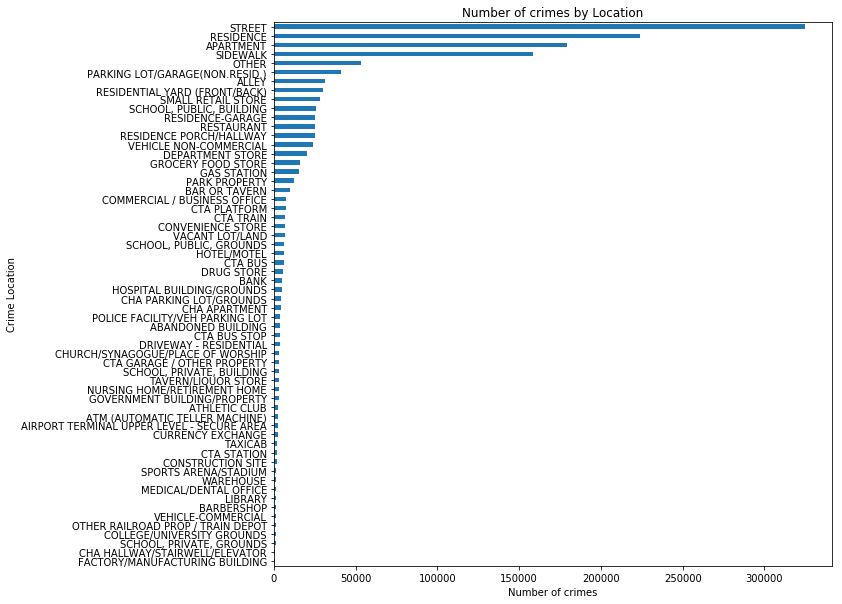

In [48]:
plt.figure(figsize=(10,10))
x=data.groupby([data['Location Description']]).size().sort_values(ascending=True)
print(len(x))
x[-60:].plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

Above graph plots top 60 ‘Location Description’ of crimes in Chicago. The graphs tell us that most crimes happen on the STREET followed by RESIDENCE, in APARTMENTS or on SIDEWALKS.

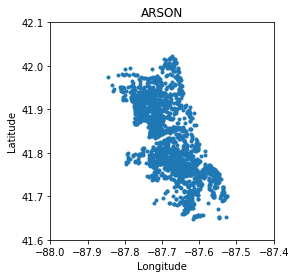

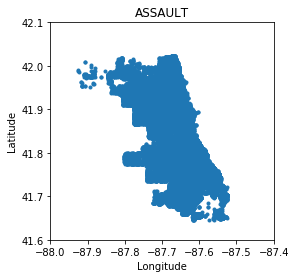

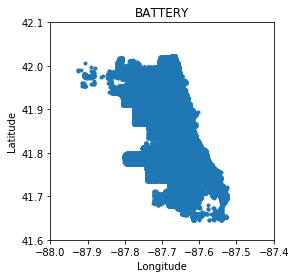

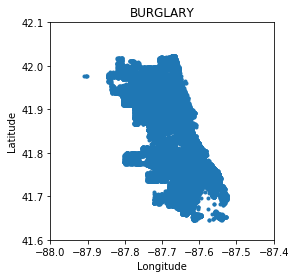

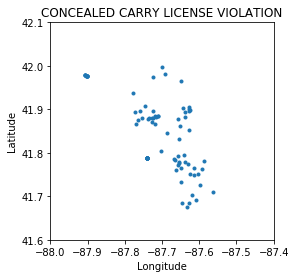

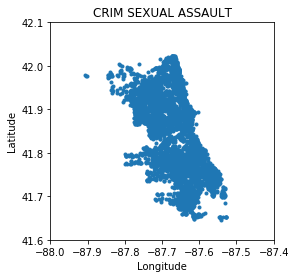

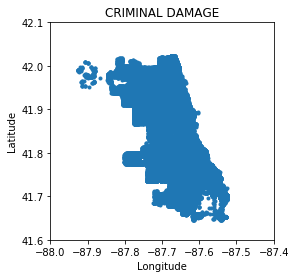

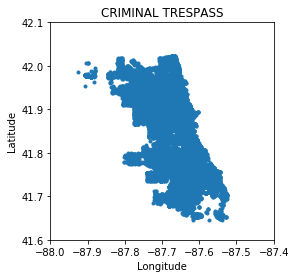

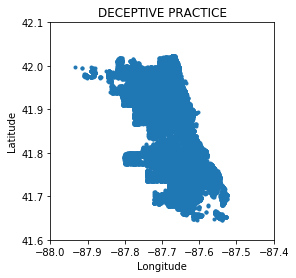

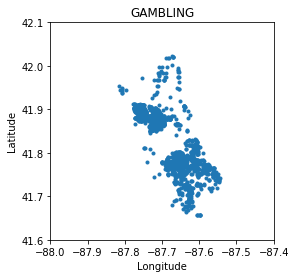

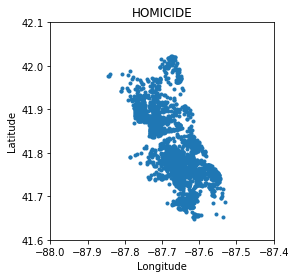

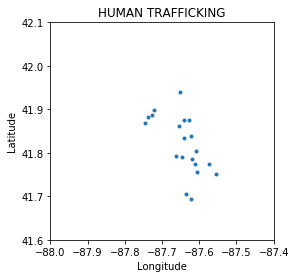

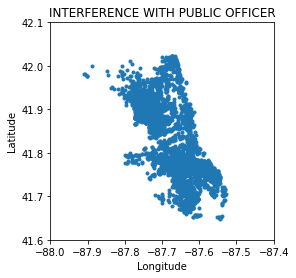

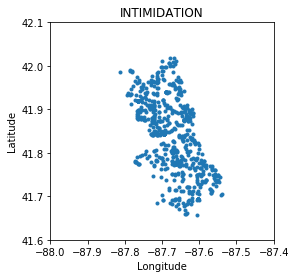

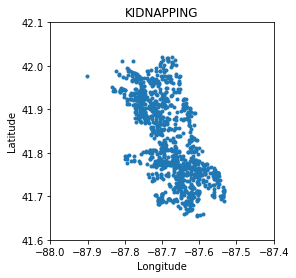

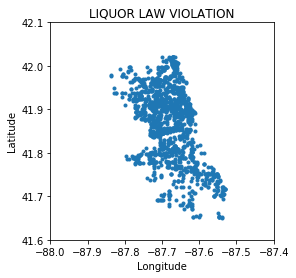

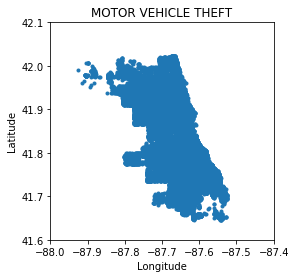

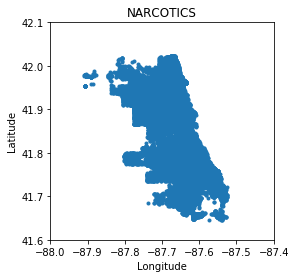

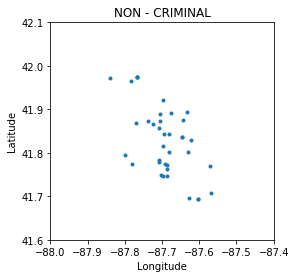

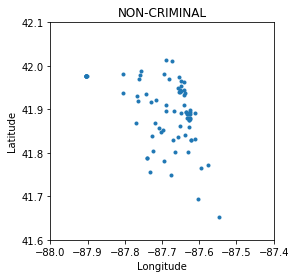

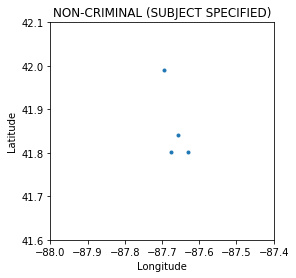

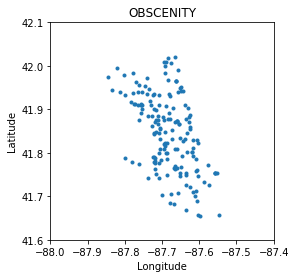

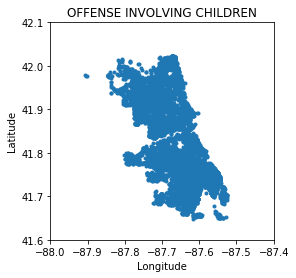

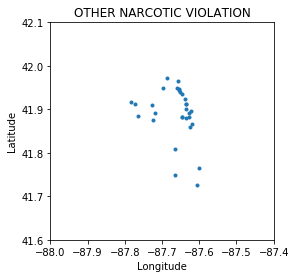

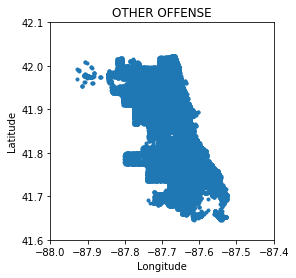

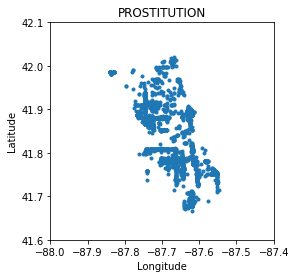

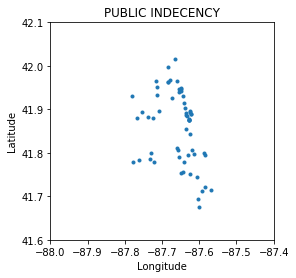

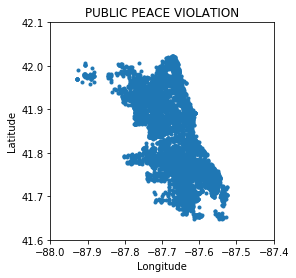

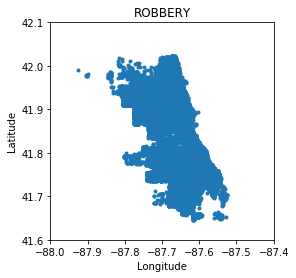

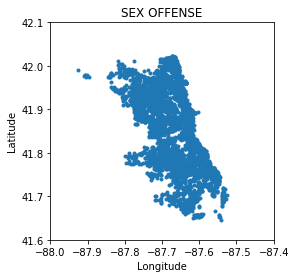

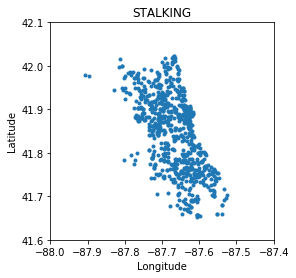

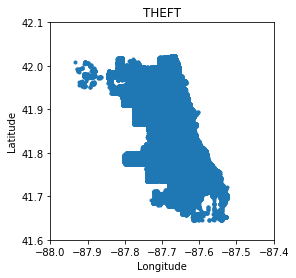

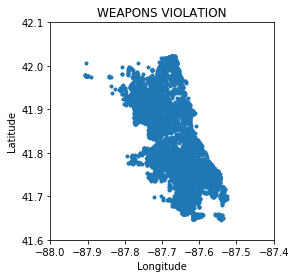

In [49]:
#extract year data for each crime,plot for each year the latitude and longitude variables
Groups = data.groupby(data['Primary Type'])
Groups = dict(list(Groups))
Keys = list(Groups.keys())
for key in Keys:
    plt.figure(figsize = (4,4))
    plt.scatter(Groups[key].Longitude, Groups[key].Latitude, marker = '.')
    plt.ylim(41.6,42.1)
    plt.xlim(-88,-87.4)
    plt.title(key)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

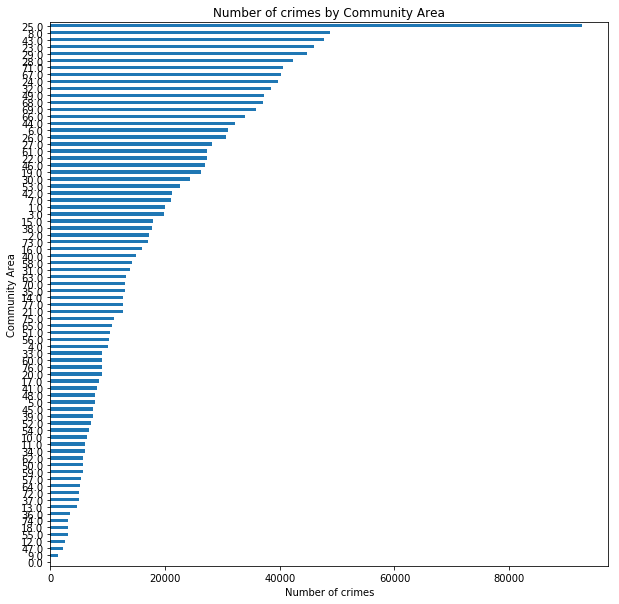

In [50]:
plt.figure(figsize=(10,10))
x=data.groupby([data['Community Area']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Community Area')
plt.ylabel('Community Area')
plt.xlabel('Number of crimes')
plt.show()

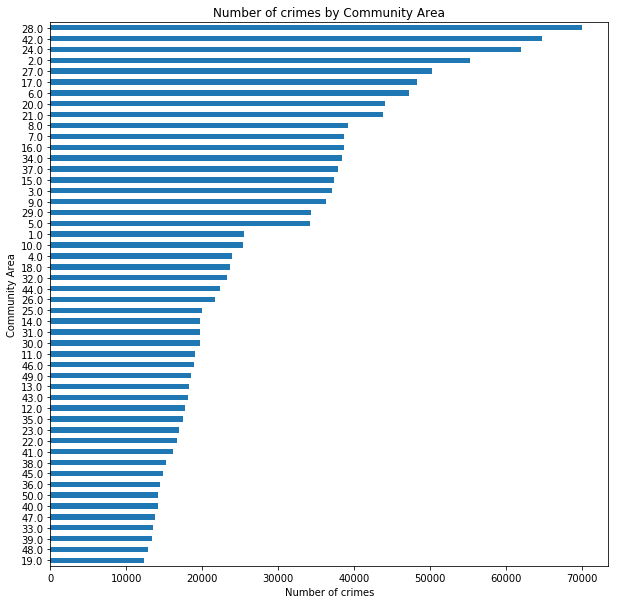

In [51]:
plt.figure(figsize=(10,10))
data.groupby([data['Ward']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Community Area')
plt.ylabel('Ward')
plt.xlabel('Number of crimes')
plt.show()

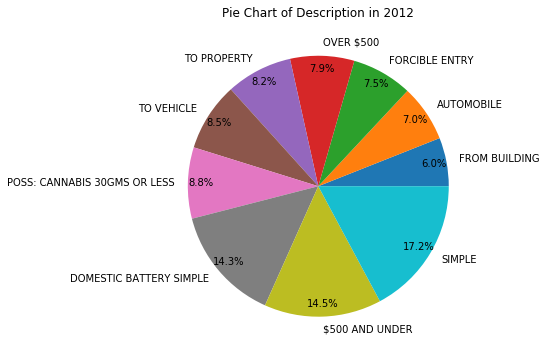

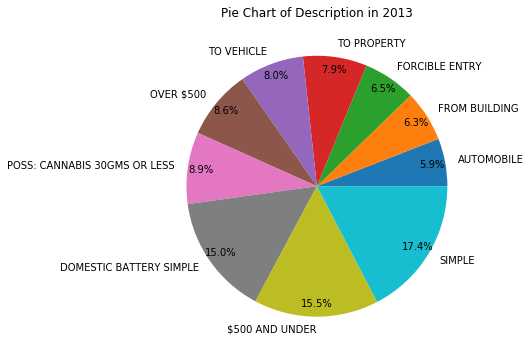

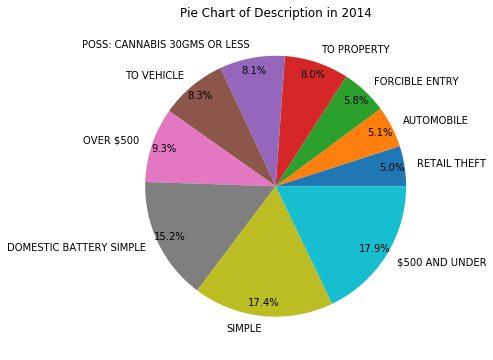

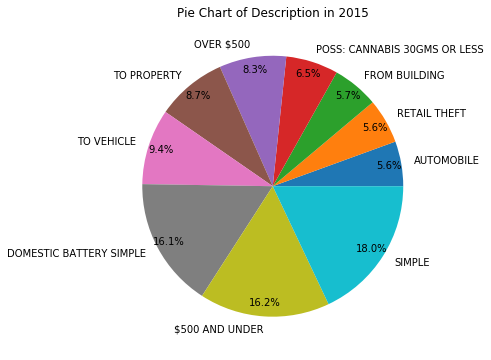

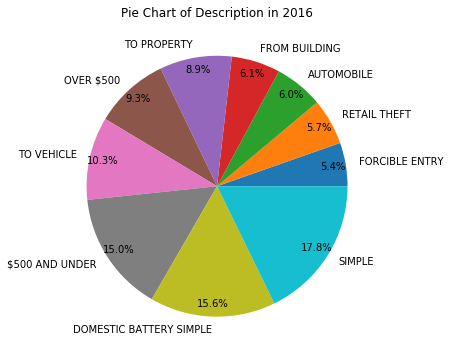

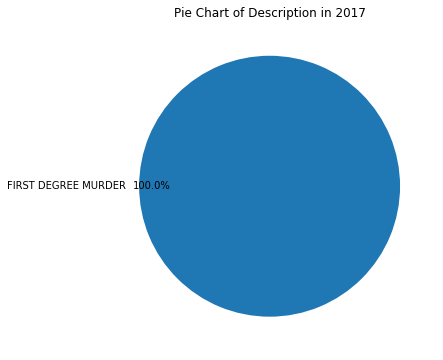

In [52]:
l=data.Year.unique()
l.sort()

for i in l:
    x=data.groupby([data.Description[data["Year"] == i]]).size().sort_values(ascending=True)
    x[-10:].plot(kind='pie', subplots=True, figsize=(6,6 ), autopct="%.1f%%",pctdistance=0.9)
    plt.title("Pie Chart of Description in "+ str(i))
    plt.ylabel("")
    plt.show()

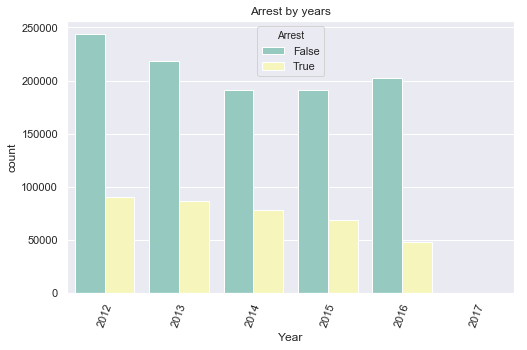

In [53]:
plt.figure(figsize=(8,5)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='Year', hue='Arrest', data=data,palette="Set3")
plt.title("Arrest by years")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

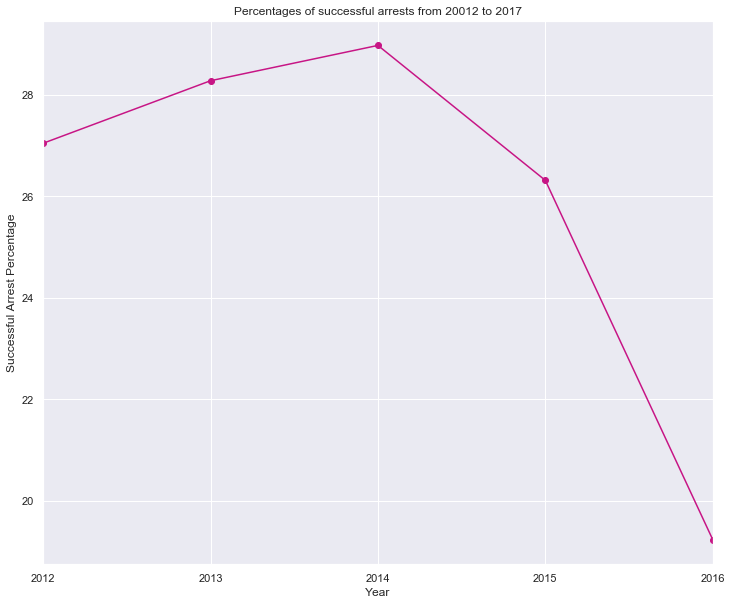

In [69]:
# Group dataset by year and arrests
arrest_year = data.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_year['Percentage'] = (100 * arrest_year / arrest_year.groupby(level=0).sum())
arrest_year.reset_index(level=[1],inplace=True)
# Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_year[arrest_year['Arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 20012 to 2017')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')
plt.savefig("SuccessfulArrest.png")

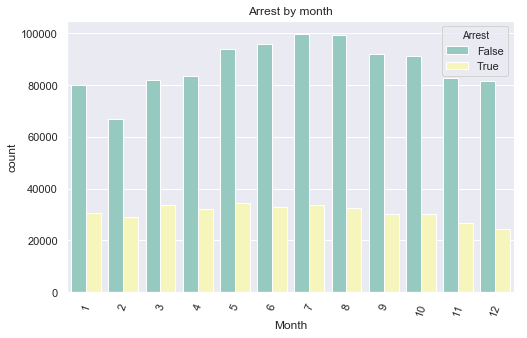

In [55]:
plt.figure(figsize=(8,5)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='Month', hue='Arrest', data=data,palette="Set3")
plt.title("Arrest by month")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

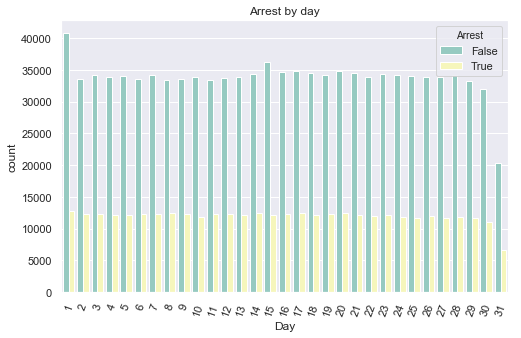

In [56]:
plt.figure(figsize=(8,5)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='Day', hue='Arrest', data=data,palette="Set3")
plt.title("Arrest by day")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

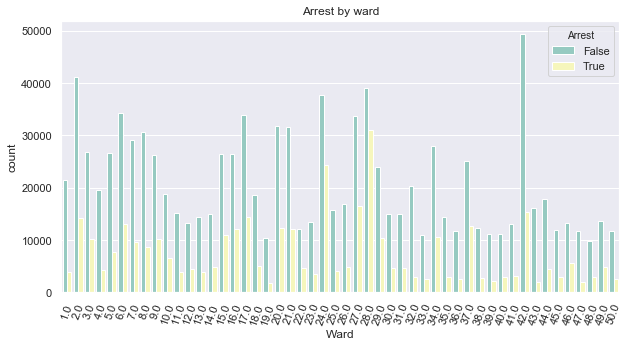

In [57]:
plt.figure(figsize=(10,5)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='Ward', hue='Arrest', data=data,palette="Set3")
plt.title("Arrest by ward")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

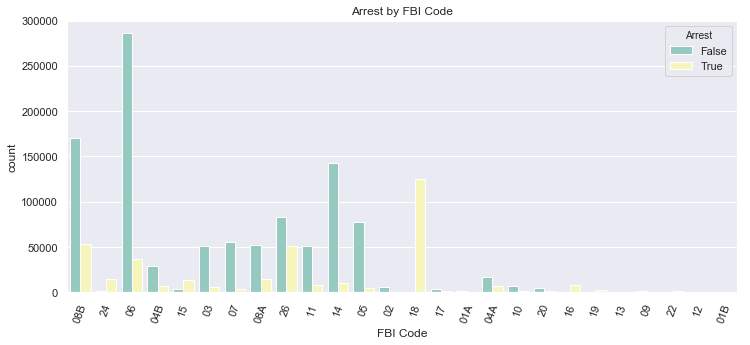

In [58]:
plt.figure(figsize=(12,5)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='FBI Code', hue='Arrest', data=data,palette="Set3")
plt.title("Arrest by FBI Code")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

In [59]:
data[data["FBI Code"] == '18'].head()

,Unnamed: 0,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Time
140,32450,HZ251054,004XX W 97TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,2223,...,18,1174958.0,1840580.0,2016,41.717933,-87.634796,"(41.717933377, -87.634796373)",4,5,12:50:00
181,44256,HZ250525,033XX W FLOURNOY ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,1134,...,18,1154249.0,1896836.0,2016,41.872744,-87.709150,"(41.87274397, -87.709149899)",4,5,12:15:00
182,44300,HZ250533,032XX W 47TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,821,...,18,1155749.0,1873296.0,2016,41.808117,-87.704276,"(41.808117346, -87.704275674)",4,5,12:14:00
284,77027,HZ250779,003XX N CENTRAL AVE,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,SIDEWALK,True,False,1523,...,18,1138983.0,1901704.0,2016,41.886393,-87.765081,"(41.886393351, -87.765080772)",4,5,09:03:00
285,77180,HZ250804,055XX W CORCORAN PL,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,1523,...,18,1139214.0,1902011.0,2016,41.887232,-87.764225,"(41.887231597, -87.764224994)",4,5,09:40:00


In [60]:
data.groupby(["FBI Code","Primary Type"]).first()

Unnamed: 0 Case Number  \
FBI Code Primary Type                                                
01A      HOMICIDE                                42460    HZ250365   
01B      HOMICIDE                               884132    HY409243   
02       CRIM SEXUAL ASSAULT                     31841    HZ250880   
         OFFENSE INVOLVING CHILDREN             194697    HZ253735   
03       ROBBERY                                  3088    HZ250587   
04A      ASSAULT                                 44495    HZ250520   
04B      BATTERY                                  1108    HZ250447   
05       BURGLARY                                18748    HZ251384   
06       THEFT                                     911    HZ250455   
07       MOTOR VEHICLE THEFT                      3242    HZ250577   
08A      ASSAULT                                  3307    HZ250531   
         STALKING                                18814    HZ250988   
08B      BATTERY                                     3    HZ250496   
09       ARSON                                  359142    HY514074   
10       DECEPTIVE PRACTICE                      50667    HZ222527   
11       DECEPTIVE PRACTICE                       5225    HZ250776   
12       DECEPTIVE PRACTICE                     795666    HZ230099   
13       DECEPTIVE PRACTICE                     155628    HZ251657   
14       CRIMINAL DAMAGE                          7704    HZ250777   
15       CONCEALED CARRY LICENSE VIOLATION      810047    HZ285419   
         NON-CRIMINAL                          3224362    HX401713   
         WEAPONS VIOLATION                        1935    HZ250469   
16       OFFENSE INVOLVING CHILDREN            2627261    HV443891   
         PROSTITUTION                            86333    HZ250916   
17       OBSCENITY                              793469    HZ261591   
         OFFENSE INVOLVING CHILDREN             795066    HZ260184   
         OTHER OFFENSE                          795942    HZ261650   
         PUBLIC INDECENCY                       795908    HZ261462   
         SEX OFFENSE                             33341    HZ253420   
18       NARCOTICS                               32450    HZ251054   
         OTHER NARCOTIC VIOLATION               863093    HY150633   
19       GAMBLING                               130021    HZ251574   
         OTHER OFFENSE                          846807    HY120084   
20       KIDNAPPING                              88323    HZ250812   
         OFFENSE INVOLVING CHILDREN              56011    HZ250028   
22       LIQUOR LAW VIOLATION                   544839    HZ254528   
24       INTERFERENCE WITH PUBLIC OFFICER        76788    HZ250674   
         OTHER OFFENSE                          871019    HY166062   
         PUBLIC PEACE VIOLATION                    197    HZ250503   
26       ARSON                                 2563293    HV345211   
         CRIMINAL TRESPASS                       18272    HZ250952   
         HUMAN TRAFFICKING                      799958    HZ241210   
         INTERFERENCE WITH PUBLIC OFFICER       792387    HZ218318   
         INTIMIDATION                           256752    HZ257206   
         KIDNAPPING                             306657    HZ252664   
         NARCOTICS                              837301    HY100944   
         NON - CRIMINAL                         839980    HY106394   
         NON-CRIMINAL                           793952    HZ258148   
         NON-CRIMINAL (SUBJECT SPECIFIED)      2659089    HV492871   
         OFFENSE INVOLVING CHILDREN             837439    HY101134   
         OTHER OFFENSE                            4571    HZ250610   
         PUBLIC PEACE VIOLATION                  15681    HZ251032   
         STALKING                               843037    HY112958   

                                                               Block  IUCR  \
FBI Code Primary Type                                                        
01A      HOMICIDE                    

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1418365 non-null int64
Case Number             1418365 non-null object
Block                   1418365 non-null object
IUCR                    1418365 non-null object
Primary Type            1418365 non-null object
Description             1418365 non-null object
Location Description    1418365 non-null object
Arrest                  1418365 non-null bool
Domestic                1418365 non-null bool
Beat                    1418365 non-null int64
District                1418365 non-null float64
Ward                    1418365 non-null float64
Community Area          1418365 non-null float64
FBI Code                1418365 non-null object
X Coordinate            1418365 non-null float64
Y Coordinate            1418365 non-null float64
Year                    1418365 non-null int64
Latitude                1418365 non-null float64
Longitude               

In [70]:
data.drop(['Unnamed: 0','Case Number','IUCR','FBI Code','Location','X Coordinate','Y Coordinate'], inplace = True, axis = 1)

KeyError: "['Case Number' 'IUCR' 'FBI Code' 'Location' 'X Coordinate' 'Y Coordinate'] not found in axis"

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 17 columns):
Unnamed: 0              1418365 non-null int64
Block                   1418365 non-null object
Primary Type            1418365 non-null object
Description             1418365 non-null object
Location Description    1418365 non-null object
Arrest                  1418365 non-null bool
Domestic                1418365 non-null bool
Beat                    1418365 non-null int64
District                1418365 non-null float64
Ward                    1418365 non-null float64
Community Area          1418365 non-null float64
Year                    1418365 non-null int64
Latitude                1418365 non-null float64
Longitude               1418365 non-null float64
Day                     1418365 non-null int64
Month                   1418365 non-null int64
Time                    1418365 non-null object
dtypes: bool(2), float64(5), int64(5), object(5)
memory usage: 175.8+ MB


In [64]:
data.corr()


,Unnamed: 0,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Day,Month
Unnamed: 0,1.000000,-0.066580,0.008016,-0.003399,-0.001547,0.004296,-0.009866,0.581975,0.008340,0.002438,0.014690,0.326639
Arrest,-0.066580,1.000000,-0.062751,-0.021352,-0.021159,-0.010203,0.015900,-0.052670,-0.019394,-0.031340,-0.004024,-0.040194
Domestic,0.008016,-0.062751,1.000000,-0.046446,-0.046218,-0.065042,0.075532,0.019566,-0.078466,0.011306,-0.001289,-0.007679
Beat,-0.003399,-0.021352,-0.046446,1.000000,0.997317,0.683335,-0.494484,-0.008984,0.587436,-0.495451,-0.001195,-0.001331
District,-0.001547,-0.021159,-0.046218,0.997317,1.000000,0.687026,-0.494677,-0.005506,0.588543,-0.498118,-0.000931,0.001904
Ward,0.004296,-0.010203,-0.065042,0.683335,0.687026,1.000000,-0.542930,0.002520,0.607187,-0.407025,-0.001018,0.004474
Community Area,-0.009866,0.015900,0.075532,-0.494484,-0.494677,-0.542930,1.000000,-0.008931,-0.712729,0.225947,-0.000503,-0.008797
Year,0.581975,-0.052670,0.019566,-0.008984,-0.005506,0.002520,-0.008931,1.000000,0.007820,-0.000234,0.006336,0.017404
Latitude,0.008340,-0.019394,-0.078466,0.587436,0.588543,0.607187,-0.712729,0.007820,1.000000,-0.282209,0.000349,0.006889
Longitude,0.002438,-0.031340,0.011306,-0.495451,-0.498118,-0.407025,0.225947,-0.000234,-0.282209,1.000000,0.001800,0.004292


beat and District are SO correlated(kind of same values) <br/>
Same for (X Coordinate, Latitude) and (Y Coordinate, Longitude)

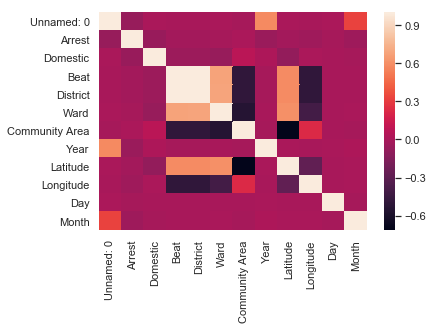

In [65]:
sns.heatmap(data.corr())